In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 拿出iris数据集中两个分类的数据和[sepal length，sepal width]作为特征
iris = load_iris()    # 读取数据集
data = pd.DataFrame(data = iris.data, columns=iris.feature_names)  
data['label'] = iris.target # 把要预测的分类加上
data.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label'] # 改下名字
data    # iris这个数据集总共三类，我们拿前两类来训练算法即可，而且是排列好的

,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


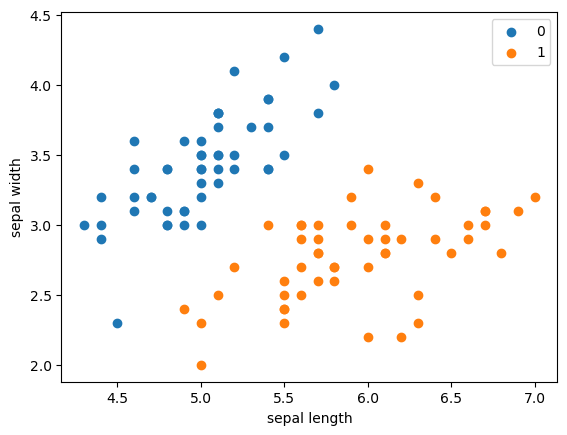

In [3]:
# 可视化一下数据
plt.scatter(data[:50]['sepal length'], data[:50]['sepal width'], label='0')
plt.scatter(data[50:100]['sepal length'], data[50:100]['sepal width'], label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [4]:
# 接下来取出我们想要的数据，特征列作为X，label列作为y
x = np.array(data.iloc[:100, :2])
y = np.array(data.iloc[:100, -1])
y = np.array([1 if item==1 else -1 for item in y])   # 转化成感知机里面要求的-1和1
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [5]:
# 构建感知机模型，用类的方式
class Perceptron():
    def __init__(self):
        # w初始化为1,b初始化为0，因为是矩阵运算，我们有100个sample，最终肯定要输出100个类，两个特征，那么意味着w也应该是两维的
        self.w = np.ones(len(x[0]), dtype=np.float32)
        self.b = 0
        self.l_rate = 0.1
    def sign(self, x, w, b):   # 模型计算公式
        y = np.dot(x, w) + b
        return y
    
    # 随机梯度下降法
    def fit(self, X_train, y_train):
        is_wrong = False
        while not is_wrong:
            wrong_count = 0    # 记录误分类点个数
            for d in range(len(X_train)):
                X = X_train[d]
                y = y_train[d]
                if y * self.sign(X, self.w, self.b) <= 0:   # 随机选一个点，如果是误分类点则更新参数
                    self.w = self.w + self.l_rate * np.dot(y, X)
                    self.b = self.b + self.l_rate * y
                    wrong_count += 1
            if wrong_count == 0:
                is_wrong = True
        return 'Perceptron Model!'
    

In [6]:
perceptron = Perceptron()
perceptron.fit(x, y)

'Perceptron Model!'

In [8]:
print(perceptron.w)
print(perceptron.b)

[  7.8 -10. ]
-12.099999999999973
